In [1]:
import pandas as pd

df = pd.read_excel('https://iea.blob.core.windows.net/assets/6296011e-4fed-40c3-95a0-1367a4c4484a/CO2Highlights2020.xls',
                   'CO2-POP', header=21, usecols=[0, 47, 48, 49], na_values='..')
df.columns = df.columns.astype(str)
df = df.round({'2017' : 2, '2018' : 2, '2019' : 2})
df2 = df[df['Region/Country/Economy'].str.contains('OECD')==False]
df2 = df2.drop(df2.index[169:172])
df2 = df2.sort_values('Region/Country/Economy', ascending=True)
df2.reset_index(drop=True, inplace=True)
##df2['Country Code'] = np.where(df2['Region/Country/Economy'] == data['Country Code'])
##my_list = list(df)
##print(my_list)
df2
##data for each year in tons CO2 emissions per capita (over population)

,Region/Country/Economy,2017,2018,2019
0,Africa,0.97,0.98,NaN
1,Africa,0.97,0.98,NaN
2,Albania,1.51,1.50,NaN
3,Algeria,3.15,3.25,NaN
4,Americas,6.93,7.02,NaN
...,...,...,...,...
158,Venezuela,4.20,3.90,NaN
159,Viet Nam,2.02,2.37,NaN
160,Yemen,0.31,0.28,NaN
161,Zambia,0.35,0.39,NaN


<AxesSubplot:xlabel='2018', ylabel='Region/Country/Economy'>

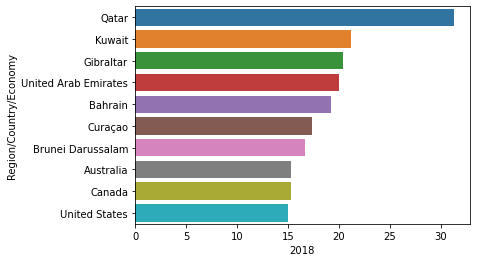

In [2]:
import seaborn as sns

df3 = df2
df3 = df3.sort_values(by='2018', ascending=False)
top = df3[:10]
sns.barplot(x=top['2018'], y=top['Region/Country/Economy'])


In [3]:
import pycountry
## match country names in data to pycountry library

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3


In [4]:
##try to keep only countries not regions

df2['Code'] = [countries.get(country) for country in df2['Region/Country/Economy']]
df2

,Region/Country/Economy,2017,2018,2019,Code
0,Africa,0.97,0.98,NaN,None
1,Africa,0.97,0.98,NaN,None
2,Albania,1.51,1.50,NaN,ALB
3,Algeria,3.15,3.25,NaN,DZA
4,Americas,6.93,7.02,NaN,None
...,...,...,...,...,...
158,Venezuela,4.20,3.90,NaN,None
159,Viet Nam,2.02,2.37,NaN,VNM
160,Yemen,0.31,0.28,NaN,YEM
161,Zambia,0.35,0.39,NaN,ZMB


In [5]:
## check where na

navals = df2['Code'].isna()
navals[navals].index

Int64Index([  0,   1,   4,   8,   9,  18,  28,  29,  37,  39,  40,  50,  51,
             53,  54,  56,  57,  58,  68,  70,  76,  84,  85,  98, 112, 114,
            115, 119, 125, 126, 133, 143, 154, 158],
           dtype='int64')

In [6]:
df2.at[18, 'Code'] = 'BOL'
df2[df2.index == 158]

,Region/Country/Economy,2017,2018,2019,Code
158,Venezuela,4.2,3.9,NaN,None


In [7]:
df2.at[29, 'Code'] = 'TWN'
df2.at[37, 'Code'] = 'CZE'
df2.at[40, 'Code'] = 'COD'
df2.at[76, 'Code'] = 'IRN'
df2.at[84, 'Code'] = 'KOR'
df2.at[119, 'Code'] = 'CHN'
df2.at[125, 'Code'] = 'MDA'
df2.at[133, 'Code'] = 'SVK'
df2.at[143, 'Code'] = 'SYR'
df2.at[154, 'Code'] = 'TZA'
df2.at[158, 'Code'] = 'VEN'
df2[df2.index == 158]

,Region/Country/Economy,2017,2018,2019,Code
158,Venezuela,4.2,3.9,NaN,VEN


In [8]:
df = df2.dropna(subset=['Code'])
df = df.rename(columns={'Region/Country/Economy' : 'Country'})
df

,Country,2017,2018,2019,Code
2,Albania,1.51,1.50,NaN,ALB
3,Algeria,3.15,3.25,NaN,DZA
5,Angola,0.63,0.61,NaN,AGO
6,Argentina,3.95,3.85,NaN,ARG
7,Armenia,1.75,1.83,NaN,ARM
...,...,...,...,...,...
158,Venezuela,4.20,3.90,NaN,VEN
159,Viet Nam,2.02,2.37,NaN,VNM
160,Yemen,0.31,0.28,NaN,YEM
161,Zambia,0.35,0.39,NaN,ZMB


<AxesSubplot:xlabel='2018', ylabel='Country'>

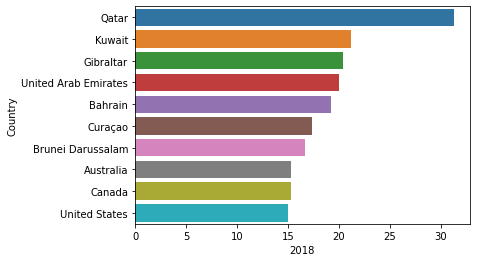

In [9]:
df = df.sort_values(by='2018', ascending=False)
top = df[:10]
sns.barplot(x=top['2018'], y=top['Country'])

<AxesSubplot:xlabel='2018', ylabel='Country'>

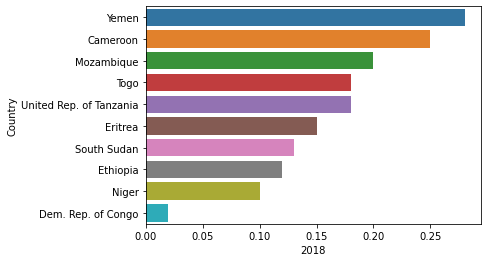

In [10]:
bottom = df[-10:]
sns.barplot(x=bottom['2018'], y=bottom['Country'])

In [11]:
print(df.describe())

             2017        2018       2019
count  141.000000  141.000000  36.000000
mean     5.095887    5.058865   7.001111
std      5.417828    5.315464   3.384228
min      0.030000    0.020000   3.160000
25%      1.220000    1.240000   4.822500
50%      3.580000    3.580000   5.780000
75%      6.780000    6.830000   8.005000
max     30.950000   31.270000  15.320000


<AxesSubplot:>

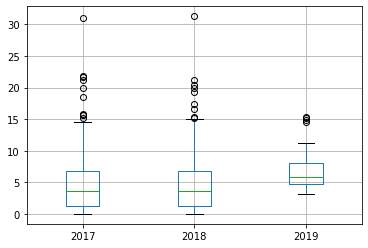

In [12]:
df.boxplot()

array([[<AxesSubplot:title={'center':'2017'}>,
        <AxesSubplot:title={'center':'2018'}>],
       [<AxesSubplot:title={'center':'2019'}>, <AxesSubplot:>]],
      dtype=object)

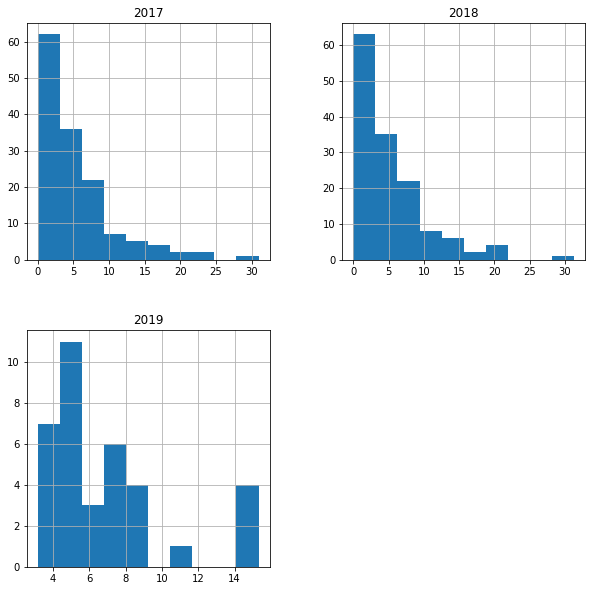

In [13]:
df.hist(figsize=(10,10))

# GRO data import

In [14]:
GRO = pd.read_excel('https://recovery.smithschool.ox.ac.uk/wp-content/uploads/2021/05/20210524-Global-Recovery-Observatory-publicv2.xlsx', sheet_name="COVID-19 Measures",
                  na_values=[".."], usecols={'Country', 'Total Value, USD (billions)', 'Clean archetype?', 'Recovery?'})
index = GRO[GRO['Recovery?'] != 1].index
rec = GRO.drop(index, inplace=False)
rec = rec.groupby(["Country"], as_index=False).sum()
rec = rec.drop(columns=['Recovery?', 'Clean archetype?'])

index2 = GRO[GRO['Clean archetype?'] != 1].index
greenrec = GRO.drop(index2, inplace=False)
index = greenrec[greenrec['Recovery?'] != 1].index
greenrec.drop(index, inplace=True)
greenrec = greenrec.groupby(["Country"], as_index=False).sum()
greenrec = greenrec.drop(columns=['Recovery?', 'Clean archetype?'])

In [15]:
merge = greenrec.merge(rec, how='left', left_on='Country', right_on='Country')
merge['Percent'] = (merge['Total Value, USD (billions)_x'] / merge['Total Value, USD (billions)_y']) * 100
merge.rename(columns = {"Total Value, USD (billions)_x" : "Green recovery spending", "Total Value, USD (billions)_y" : "Recovery spending"}, inplace=True)
merge = merge.round({"Percent" : 2})
merge

,Country,Green recovery spending,Recovery spending,Percent
0,Argentina,0.00,6.82,0.00
1,Australia,2.30,130.95,1.76
2,Austria,0.38,1.60,23.75
3,Bangladesh,0.55,0.63,87.30
4,Brazil,0.28,0.54,51.85
5,Burkina Faso,0.00,0.00,NaN
6,Canada,21.67,38.70,55.99
7,Chile,0.45,3.13,14.38
8,China,51.88,427.52,12.14
9,Colombia,0.15,0.32,46.88


In [16]:
df.at[119, 'Country'] = 'China'
df.at[84, 'Country'] = 'South Korea'
df.at[159, 'Country'] = 'Vietnam'

In [17]:
df[df['Code']=='VNM']

,Country,2017,2018,2019,Code
159,Vietnam,2.02,2.37,NaN,VNM


In [18]:
GROmerge = merge.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge

,Country,Green recovery spending,Recovery spending,Percent,2017,2018,2019,Code
0,Argentina,0.00,6.82,0.00,3.95,3.85,NaN,ARG
1,Australia,2.30,130.95,1.76,15.60,15.32,15.32,AUS
2,Austria,0.38,1.60,23.75,7.29,6.96,7.07,AUT
3,Bangladesh,0.55,0.63,87.30,0.49,0.51,NaN,BGD
4,Brazil,0.28,0.54,51.85,2.06,1.94,NaN,BRA
5,Burkina Faso,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6,Canada,21.67,38.70,55.99,15.14,15.25,15.21,CAN
7,Chile,0.45,3.13,14.38,4.65,4.57,4.95,CHL
8,China,51.88,427.52,12.14,6.67,6.84,NaN,CHN
9,Colombia,0.15,0.32,46.88,1.42,1.47,NaN,COL


array([[<AxesSubplot:xlabel='Green recovery spending', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='Percent', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='2017', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='2018', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='2019', ylabel='Green recovery spending'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='Percent', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='2017', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='2018', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='2019', ylabel='Recovery spending'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='Percent'>,
        <AxesSubplot:xlabel='Recovery 

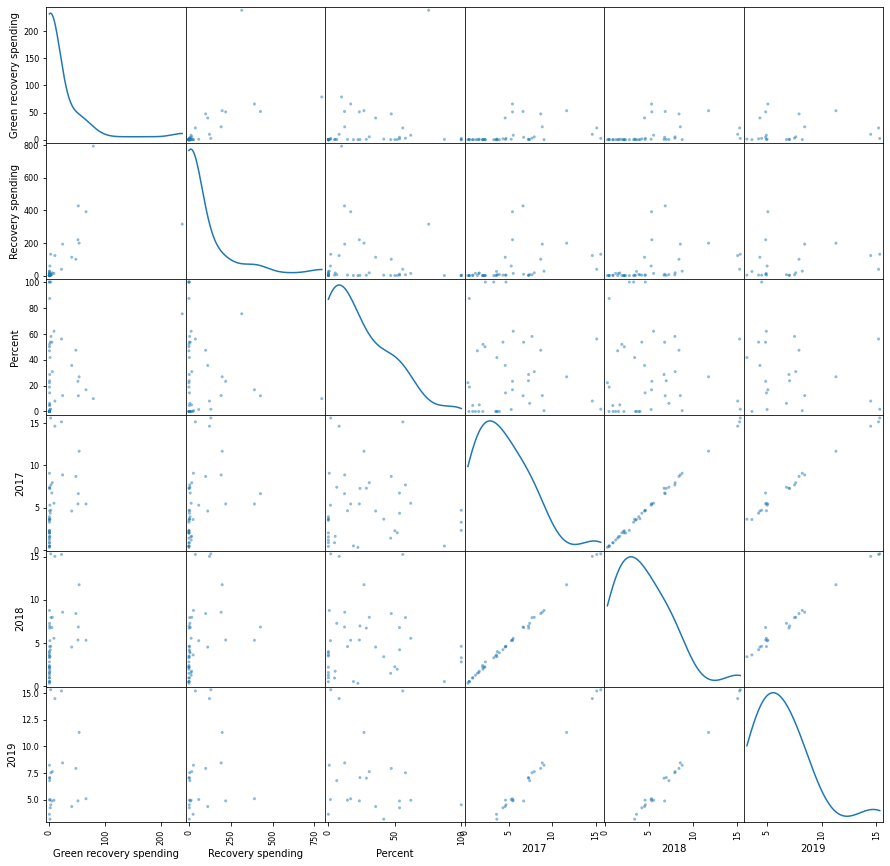

In [19]:
from pandas.plotting import scatter_matrix

scatter_matrix(GROmerge, alpha=0.5, diagonal='kde', figsize=(15,15))

In [20]:
corr = GROmerge.corr(method='pearson')
corr

,Green recovery spending,Recovery spending,Percent,2017,2018,2019
Green recovery spending,1.000000,0.651449,0.172324,0.368559,0.366671,0.069849
Recovery spending,0.651449,1.000000,-0.121912,0.385552,0.385954,0.177777
Percent,0.172324,-0.121912,1.000000,-0.033965,-0.029180,-0.205024
2017,0.368559,0.385552,-0.033965,1.000000,0.998704,0.993332
2018,0.366671,0.385954,-0.029180,0.998704,1.000000,0.992422
2019,0.069849,0.177777,-0.205024,0.993332,0.992422,1.000000


<AxesSubplot:>

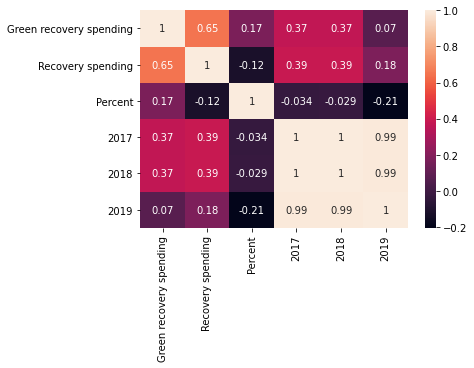

In [21]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)


In [52]:
import plotly.graph_objects as go

hover_text = []
for index, row in GROmerge.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Green recovery spending as % of recovery spending: {percent}<br>'+
                      'CO2 emissions per capita (tons CO2/population): {co2}<br>'+
                      'Green recovery spending (USD billions): {grs}<br>').format(country=row['Country'],
                                            percent=row['Percent'],
                                            co2=row['2018'],
                                            grs=row['Green recovery spending'],
                                            ))
fig = go.Figure(data=[go.Scatter(
    x=GROmerge['Percent'], y=GROmerge['2018'],
    text=hover_text,
    mode='markers',
      marker=dict(
        size=GROmerge['Green recovery spending'])
)
])

fig.update_layout(
    title='Green recovery spending vs CO2 emissions per capita 2018',
    xaxis=dict(
        title='Green recovery spending as % of recovery spending',
        gridcolor='white',
        ##type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='C02 emissions per capita',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

sizeref = 0.1 * max(GROmerge['Green recovery spending']) / (20 ** 2)
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=1, line_color='black'))

fig.show()

##really few points because not scaled - others not visible?
##https://plotly.com/python/bubble-charts/